# Running `fftvis`

Here's a quick tutorial for running `fftvis`.

In [1]:
# Standard imports
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt

# HERA-stack imports
import fftvis
from hera_sim.antpos import hex_array
from pyuvdata.telescopes import Telescope
from pyuvdata.analytic_beam import GaussianBeam, UniformBeam

In [2]:
# define antenna array positions
antpos = hex_array(3, split_core=True, outriggers=0)

In [3]:
# define antenna beam
beam = GaussianBeam(diameter=14.0)

In [4]:
# define a list of frequencies
nfreqs = 10
freqs = np.linspace(100e6, 120e6, nfreqs)

In [5]:
# define a list of times with an astropy time.Time object
ntimes = 80
times = Time(np.linspace(2459845, 2459845.05, ntimes), format='jd', scale='utc')

In [6]:
# number of sources
nsource = 35

ra = np.deg2rad(np.linspace(0, 360, nsource))        # ra of each source (in rad)
dec = np.deg2rad(np.linspace(-60, 10.0, nsource))    # dec of each source (in rad)
flux = np.ones(nsource)                              # flux of each source at 100MHz (in Jy)
alpha = np.ones(nsource) * -0.8                      # sp. index of each source

# Now get the (Nsource, Nfreq) array of the flux of each source at each frequency.
flux_allfreq = ((freqs[:, np.newaxis] / freqs[0]) ** alpha.T * flux.T).T

## Run `fftvis` in single processor mode

In [29]:
%%time
# simulate visibilities 
vis_vc = fftvis.simulate.simulate_vis(
    ants=antpos,
    fluxes=flux_allfreq,
    ra=ra,
    dec=dec,
    freqs=freqs,
    times=times.jd,
    telescope_loc=Telescope.from_known_telescopes('hera').location,
    beam=beam,
    polarized=False,
    precision=2,
    trace_mem=False,
    nprocesses=1,
    n
)

CPU times: user 5.13 s, sys: 4.45 s, total: 9.57 s
Wall time: 5.16 s


In [9]:
fftvis.simulate.simulate_vis??

Signature:
fftvis.simulate.simulate_vis(
    ants: 'dict',
    fluxes: 'np.ndarray',
    ra: 'np.ndarray',
    dec: 'np.ndarray',
    freqs: 'np.ndarray',
    times: 'np.ndarray',
    beam,
    telescope_loc: 'EarthLocation',
    baselines: 'list[tuple]' = None,
    precision: 'int' = 2,
    polarized: 'bool' = False,
    eps: 'float' = None,
    beam_spline_opts: 'dict' = None,
    use_feed: 'str' = 'x',
    flat_array_tol: 'float' = 0.0,
    interpolation_function: 'str' = 'az_za_map_coordinates',
    nprocesses: 'int | None' = 1,
    coord_method: "Literal['CoordinateRotationAstropy', 'CoordinateRotationERFA']" = 'CoordinateRotationERFA',
    coord_method_params: 'dict | None' = None,
    force_use_ray: 'bool' = False,
    trace_mem: 'bool' = False,
)
Source:   
def simulate_vis(
    ants: dict,
    fluxes: np.ndarray,
    ra: np.ndarray,
    dec: np.ndarray,
    freqs: np.ndarray,
    times: np.ndarray,
    beam,
    telescope_loc: EarthLocation,
    baselines: list[tuple] = None,


In [31]:
%%time
# simulate visibilities 
vis_vc = fftvis.simulate.simulate_vis(
    ants=antpos,
    fluxes=flux_allfreq,
    ra=ra,
    dec=dec,
    freqs=freqs,
    times=times.jd,
    telescope_loc=Telescope.from_known_telescopes('hera').location,
    beam=beam,
    polarized=False,
    precision=2,
    trace_mem=False,
    nprocesses=4
)

CPU times: user 35.4 ms, sys: 10.1 ms, total: 45.5 ms
Wall time: 807 ms


In [32]:
baselines = fftvis.utils.get_pos_reds(antpos)

Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.


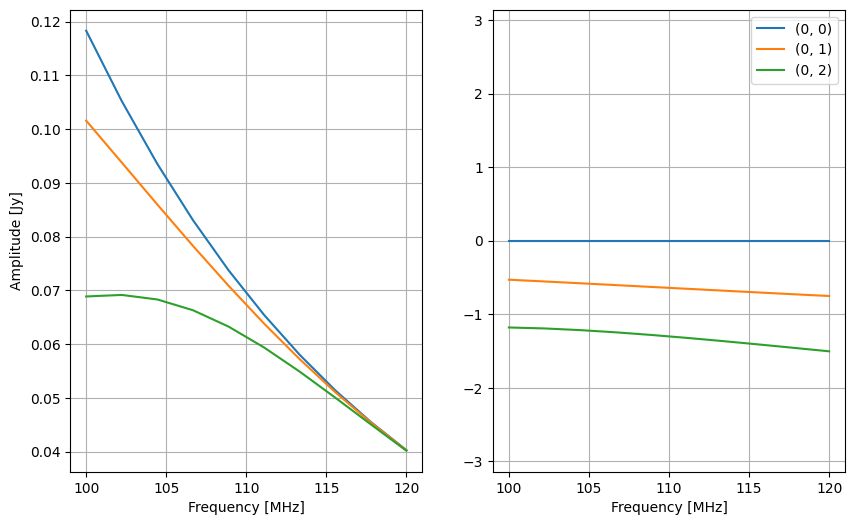

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
for bl_index, bl in enumerate(baselines[:3]):
    axs[0].plot(freqs / 1e6, np.abs(vis_vc[:, 0, bl_index]))
    axs[1].plot(freqs / 1e6, np.angle(vis_vc[:, 0, bl_index]), label=bl[0])

axs[1].legend()
axs[0].set_xlabel('Frequency [MHz]')
axs[1].set_xlabel('Frequency [MHz]')
axs[0].set_ylabel('Amplitude [Jy]')
axs[1].set_ylim(-np.pi, np.pi)
axs[0].grid()
axs[1].grid()
plt.show()

Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.


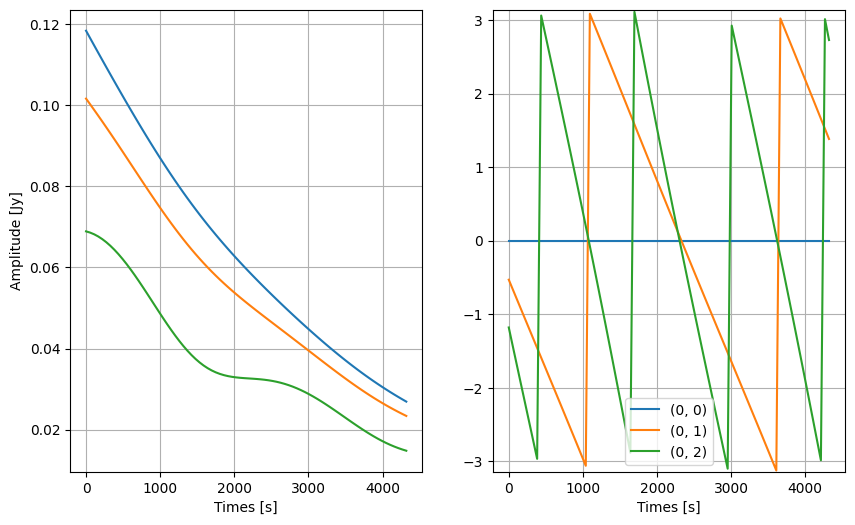

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
for bl_index, bl in enumerate(baselines[:3]):
    axs[0].plot(times.unix - times.unix[0], np.abs(vis_vc[0, :, bl_index]), label=bl[0])
    axs[1].plot(times.unix - times.unix[0], np.angle(vis_vc[0, :, bl_index]), label=bl[0])

axs[0].set_xlabel('Times [s]')
axs[1].set_xlabel('Times [s]')
axs[0].set_ylabel('Amplitude [Jy]')
axs[1].set_ylim(-np.pi, np.pi)
axs[0].grid()
axs[1].grid()
plt.legend()
plt.show()